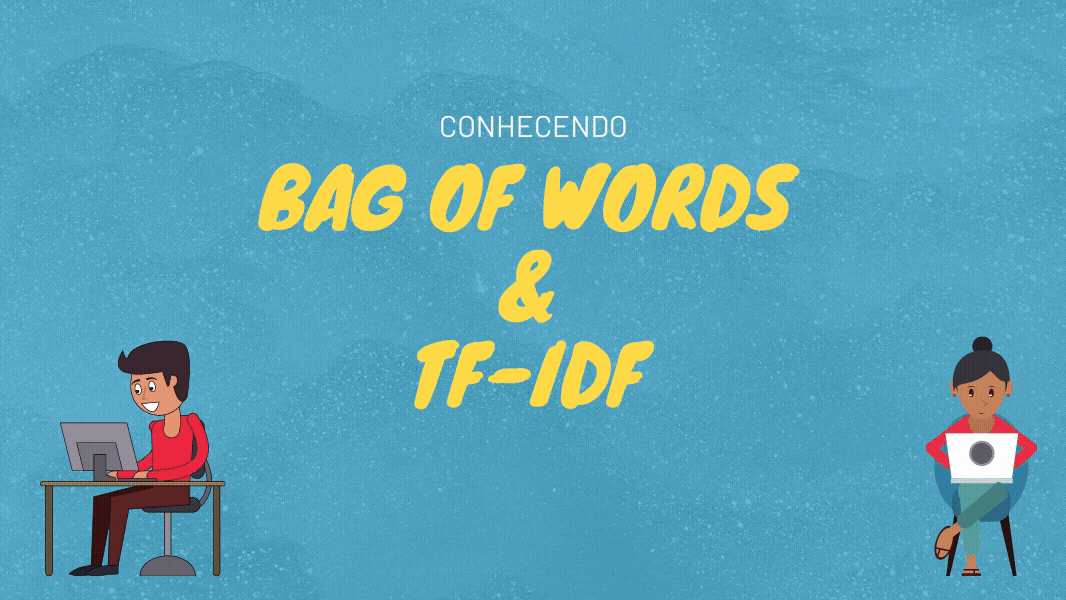

# Bag of Words

BoW é uma forma de representar o texto de acordo com a ocorrência das palavras nele. Traduzindo para o português, o "saco de palavras" recebe esse nome porque não leva em conta a ordem ou a estrutura das palavras no texto, apenas se ela aparece ou a frequência com que aparece nele.
Por exemplo, se a palavra TURING aparece muito num texto, ela se torna mais central e importante para a máquina. Portanto, BoW pode ser um ótimo método para determinar as palavras significativas de um texto com base no número de vezes que ela é usada. Bem simples, né?
Basicamente, para gerar um modelo de bag of words precisamos realizar três passos:

1) Selecionar os dados

2) Gerar o vocabulário

3) Formar vetores a partir do documento

Vamos ver cada um desses passos separadamente:


## Selecionando seus dados
Essa parte diz respeito a selecionar os dados que serão usados - no nosso caso, o texto - e prepará-lo de forma que a máquina consiga processá-lo bem. Então, primeiro, vamos falar sobre os dados com qual trabalharemos nesse artigo. Nosso texto será o poema "No Meio do Caminho" do poeta Carlos Drummond de Andrade:

In [ ]:
texto = """No meio do caminho tinha uma pedra
tinha uma pedra no meio do caminho
tinha uma pedra
no meio do caminho tinha uma pedra.

Nunca me esquecerei desse acontecimento
na vida de minhas retinas tão fatigadas.
Nunca me esquecerei que no meio do caminho
tinha uma pedra
tinha uma pedra no meio do caminho
no meio do caminho tinha uma pedra."""

In [ ]:
texto

'No meio do caminho tinha uma pedra\ntinha uma pedra no meio do caminho\ntinha uma pedra\nno meio do caminho tinha uma pedra.\n\nNunca me esquecerei desse acontecimento\nna vida de minhas retinas tão fatigadas.\nNunca me esquecerei que no meio do caminho\ntinha uma pedra\ntinha uma pedra no meio do caminho\nno meio do caminho tinha uma pedra.'

### Pré-processamento 

Com nossos dados escolhidos precisamos prepará-los. Chamamos isso de pré-processamento e você já sabe que pré-processar um texto é essencial quando queremos trabalhar com ele, principalmente quando queremos aplicar um modelo de predição ou outros métodos estatísticos. São muitos os métodos de pré-processamento, mas aqui vamos realizar apenas alguns:
* Colocar todas as letras em minúsculo
* Selecionar apenas letras com regex
* Juntar os tokens em um texto - já que, ao usar a função .findall do regex, nosso texto é dividido em tokens, ou seja, cada palavra vira uma string individual em uma lista

In [ ]:
import re

#deixa todas as letras minúsculas
texto_min = texto.lower()

#seleciona apenas letras (lembrando que o texto está em português e as letras possuem acento)
apenas_letras = re.findall(r'[a-zéóáêâãõç]+', texto_min)

#junta o texto, já que o .findall separa em tokens
novo_texto = " ".join(apenas_letras)

In [ ]:
novo_texto

'no meio do caminho tinha uma pedra tinha uma pedra no meio do caminho tinha uma pedra no meio do caminho tinha uma pedra nunca me esquecerei desse acontecimento na vida de minhas retinas tão fatigadas nunca me esquecerei que no meio do caminho tinha uma pedra tinha uma pedra no meio do caminho no meio do caminho tinha uma pedra'

## Gerando o vocabulário
Já pensou se você conseguisse memorizar todas as palavras que você visse? Diferente de nós que precisamos ver, rever uma, duas e provavelmente mais vezes para memorizar, o computador já consegue fazer isso de primeira. Então para gerar o vocabulário que nada mais é que a coleção de todas as palavras que ocorrem em um texto, basta passarmos todas elas uma vez só.
Então a ideia para o código é basicamente:
* Separar nosso texto em tokens;
* Criar uma lista para guardarmos o vocabulário;
* Fazer um loop para percorrer o texto inteiro;
* Criar uma condicional para verificar se a palavra está na lista -fazemos isso porque nosso vocabulário conta apenas as ocorrências únicas, sem repetições de palavras;
* Caso não esteja, ela é adicionada.


Vamos ver como fica isso na prática? Olha só!

In [ ]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokens = word_tokenize(novo_texto)
tokens

['no',
 'meio',
 'do',
 'caminho',
 'tinha',
 'uma',
 'pedra',
 'tinha',
 'uma',
 'pedra',
 'no',
 'meio',
 'do',
 'caminho',
 'tinha',
 'uma',
 'pedra',
 'no',
 'meio',
 'do',
 'caminho',
 'tinha',
 'uma',
 'pedra',
 'nunca',
 'me',
 'esquecerei',
 'desse',
 'acontecimento',
 'na',
 'vida',
 'de',
 'minhas',
 'retinas',
 'tão',
 'fatigadas',
 'nunca',
 'me',
 'esquecerei',
 'que',
 'no',
 'meio',
 'do',
 'caminho',
 'tinha',
 'uma',
 'pedra',
 'tinha',
 'uma',
 'pedra',
 'no',
 'meio',
 'do',
 'caminho',
 'no',
 'meio',
 'do',
 'caminho',
 'tinha',
 'uma',
 'pedra']

## Vocabulário

In [ ]:
Vocab = []
for token in tokens:
    if token not in Vocab:
        Vocab.append(token)

print(Vocab,"\n",len(Vocab))

['no', 'meio', 'do', 'caminho', 'tinha', 'uma', 'pedra', 'nunca', 'me', 'esquecerei', 'desse', 'acontecimento', 'na', 'vida', 'de', 'minhas', 'retinas', 'tão', 'fatigadas', 'que'] 
 20


### Formando vetor do documento

Como o vocabulário tem um número fixo de palavras, podemos usar uma representação de tamanho fixo equivalente a esse número: um vetor! Cada elemento desse vetor corresponderá a uma palavra do vocabulário. Há diversas formas de preencher nosso vetor com números para representar um documento (uma 'amostra' de um conjunto maior de textos), por exemplo, usar a contagem de vezes em que a palavra aparece nele. Mas a maneira mais básica de fazer isso é atribuindo um valor booleano: 1 se a palavra aparece, 0 se não; isso é chamado de one-hot encoding.

Podemos pensar nesse processo como uma tabulação do documento, veja o exemplo com os versos "Nunca me esquecerei que no meio do caminho/tinha uma pedra/tinha uma pedra no meio do caminho/no meio do caminho tinha uma pedra.":

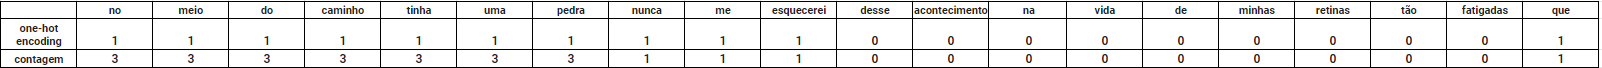



Assim, para codificar com one-hot, o passo a passo é:
* Criar uma lista que representa o vetor;
* Fazer um loop para percorrer todas as palavras do vocabulário;
* Se a palavra estiver no documento, adicionar 1 à lista; caso contrário, adicionar 0;
* Transformar a lista final em um array do numpy e retornar.

In [ ]:
import numpy as np

In [ ]:
def cria_vetor_documento(documento, vocab):
  vetor = []

  for palavra in vocab:
    if palavra in documento:
        vetor.append(1)
    else:
        vetor.append(0)
  
  return np.array(vetor)

# TFIDF

TF-IDF vem para superar os problemas do Bag of Words. Trata-se de medidas estatísticas para medir o quão importante uma palavra é em um documento (texto), assim como BoW, mas com algumas diferenças.
Com ele, podemos perceber a importância de uma palavra por meio de uma pontuação, o TF-IDF de uma palavra em um texto é feito multiplicando duas métricas diferentes:
* Term Frequency (a frequência do termo), que mede a frequência com que um termo ocorre num documento;
* Inverse Document Frequency (inverso da frequência nos documentos), que mede o quão importante um termo é no contexto de todos os documentos.

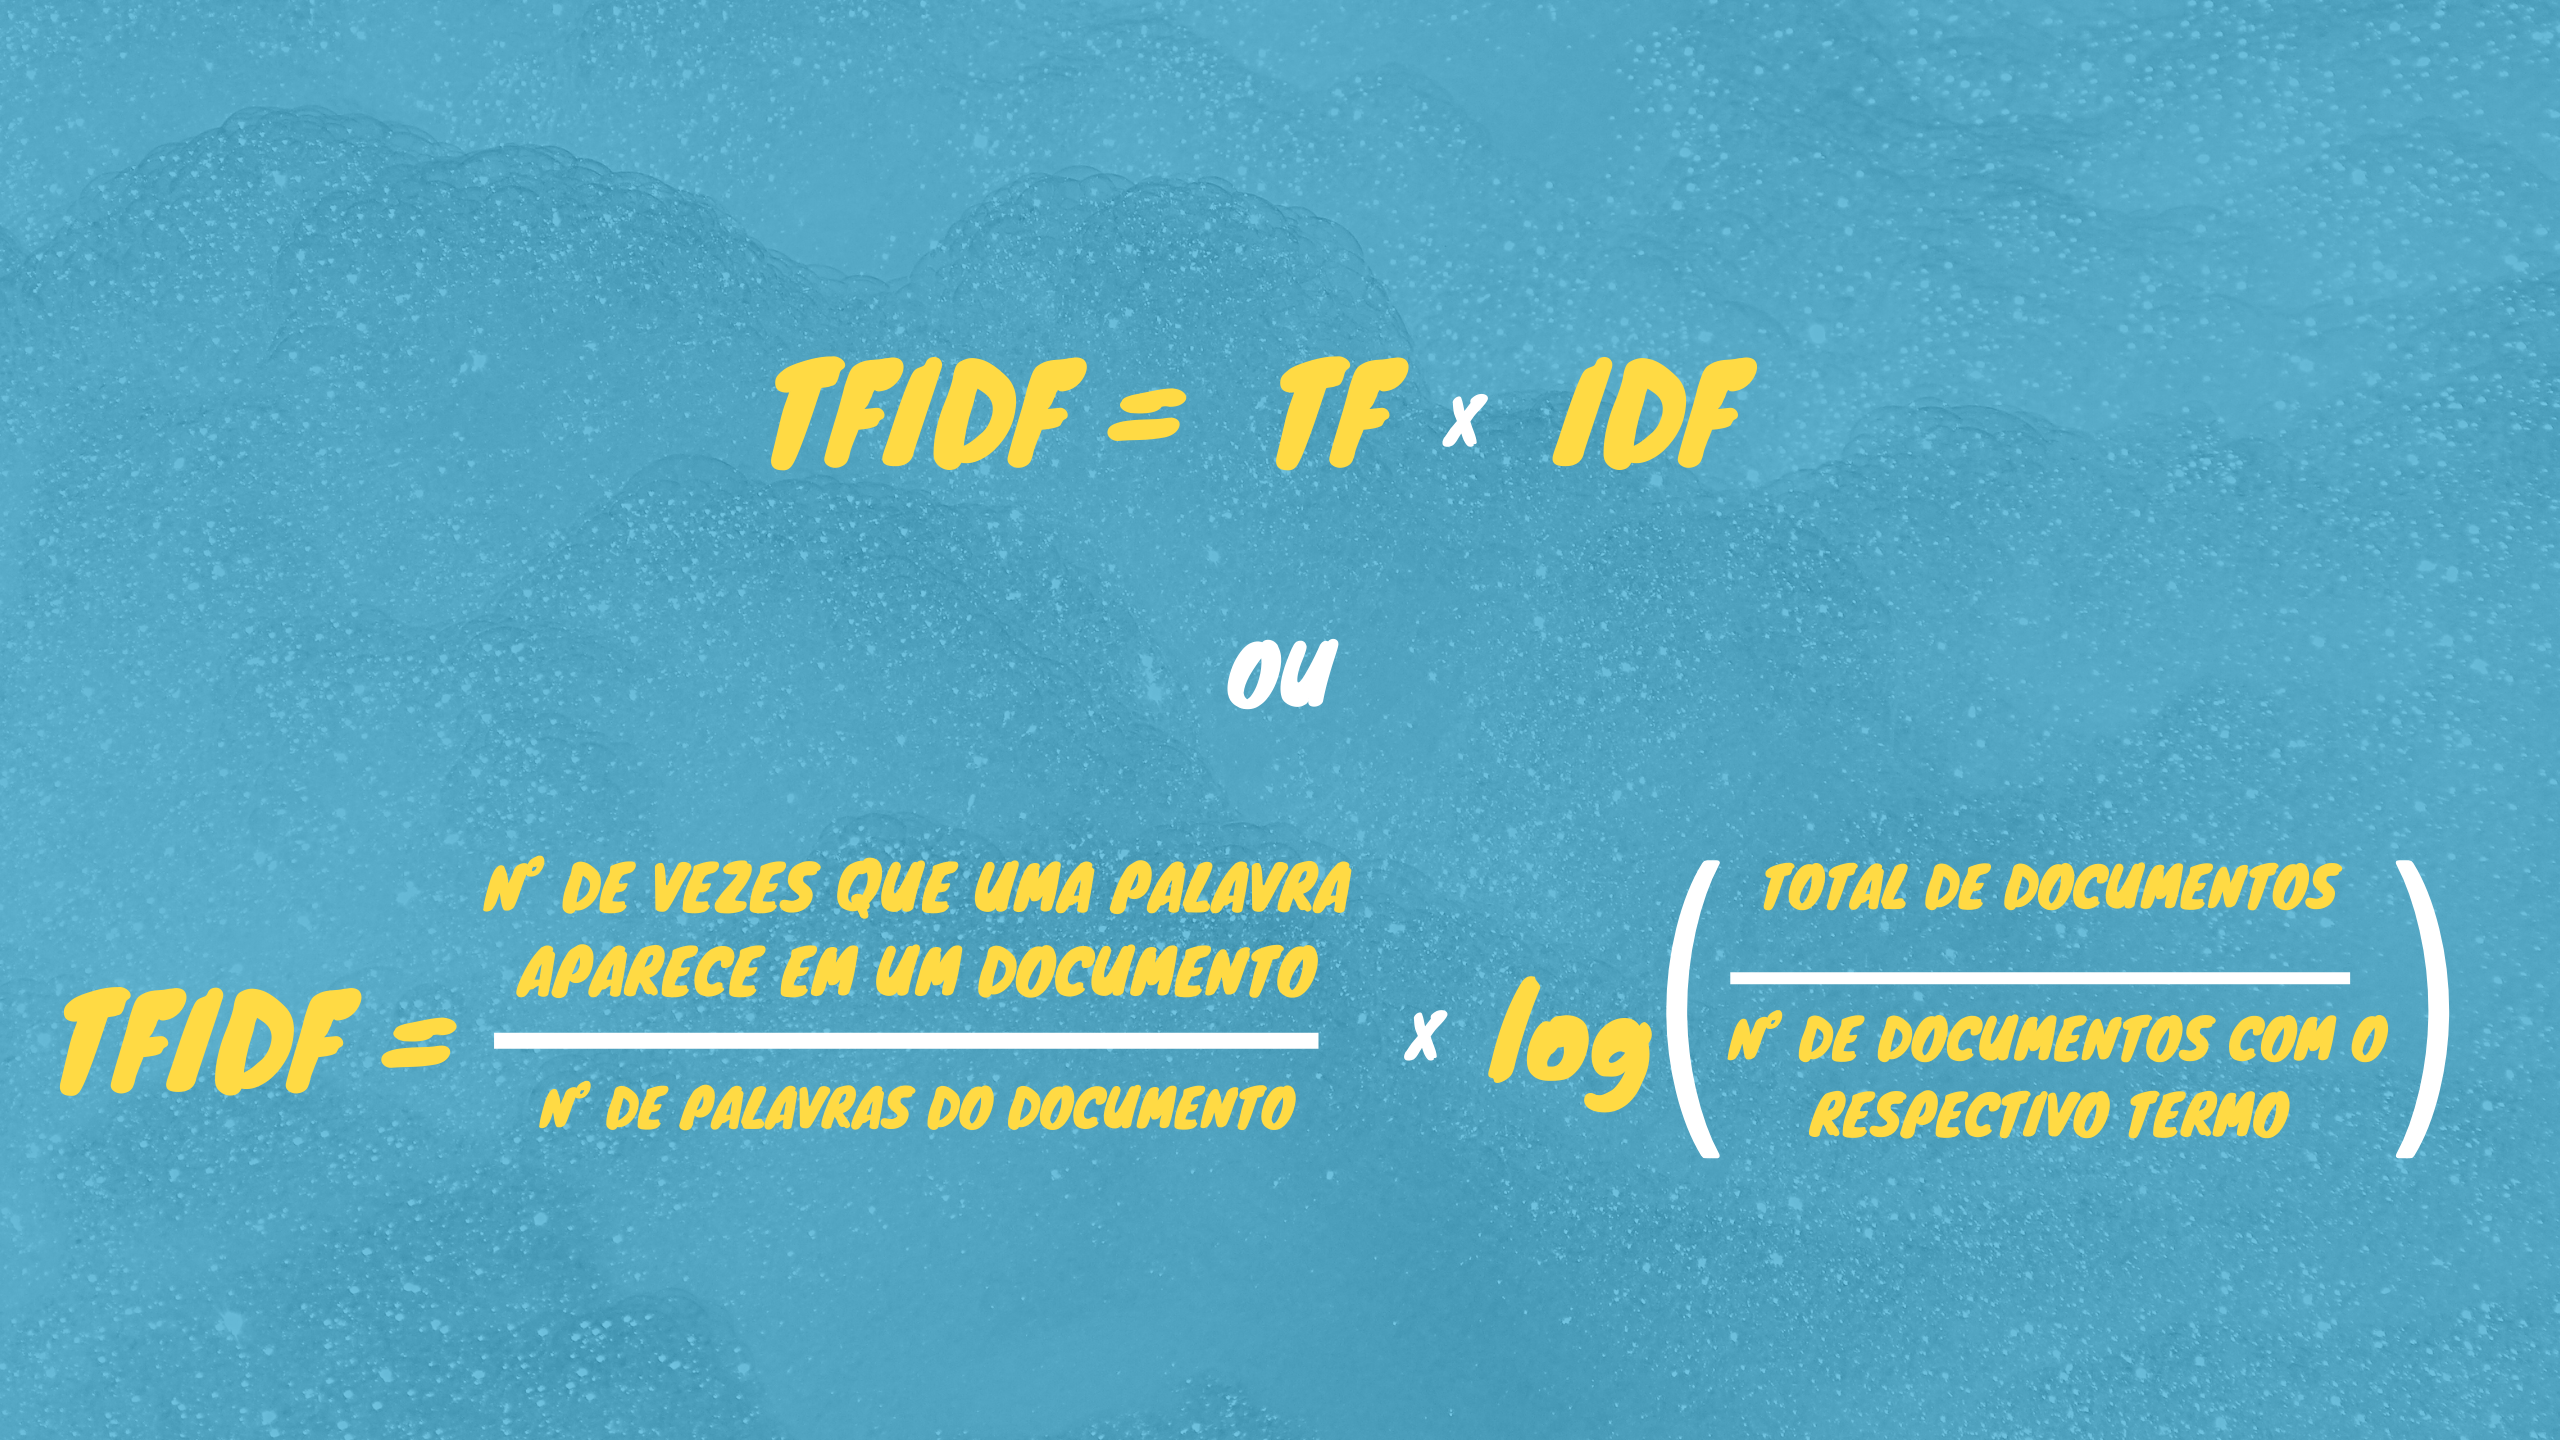

Em outras palavras, para o TF-IDF, quanto mais frequente uma palavra é em seu documento, mais importante ela tende a ser. Entretanto, isso depende da repetição dela ao longo de todos os documentos que estão sendo analisados.

Por exemplo, suponhamos que estejamos analisando três documentos: 
* uma revista de futebol, 
* uma de vôlei 
* e uma de basquete.

Temos palavras que se repetem ao longo de todos esses documentos, por exemplo, a palavra "esporte" deve aparecer em todas as três revistas, certo? Então, provavelmente, não contribui muito para uma análise. Porém, palavras que se repetem muito em documentos individuais dizem mais a respeito dele, então a palavra "cesta", por exemplo, que pode se repetir muito na revista sobre basquete, mas não nas outras, tende a se tornar mais importante para o TF-IDF. Por isso dizemos que a repetição das palavras importa com relação aos documentos que estão sendo analisados. Interessante, né?

No nosso poema, consideraremos cada estrofe como um documento (mas poderíamos fazer de outras formas também, considerando cada verso como um documento, por exemplo).

In [ ]:
estrofe1= """no meio do caminho tinha uma pedra tinha uma pedra no meio do caminho tinha uma pedra no meio do caminho tinha uma pedra"""

estrofe2 = """nunca me esquecerei desse acontecimento na vida de minhas retinas tão fatigadas nunca me esquecerei que no meio do caminho tinha uma pedra tinha uma pedra no meio do caminho no meio do caminho tinha uma pedra"""

## Implementando
Para a implementação de TF-IDF precisamos seguir passos muito semelhantes ao que fizemos com BoW anteriormente: 
* Primeiro, é preciso selecionar seus dados e pré-processar seu texto; 
* Depois, gerar um vocabulário, ou seja, uma lista com todos os termos do nosso texto;

Essas duas etapas já foram feitas lá em cima, então não vamos repeti-la - Lembre-se apenas que nosso vocabulário está armazenado na lista Vocab - Portanto, vamos direto para o último passo:
* Gerar um dicionário de frequência desses termos

Então vamos para a implementação!

Para criar o dicionário vamos criar uma função `dicionario_de_contagem`, que retorna a palavra e a quantidade de ocorrências dela. Basicamente, essa função recebe como argumento a lista Vocab, que já criamos, e o documento tokenizado, e cria um dicionário com as palavras do poema seguidas do número de ocorrências delas:

In [ ]:
e1_tokens = estrofe1.split()

e2_tokens = estrofe2.split()

In [ ]:
def dicionario_de_contagem(vocabulario, documento):
  '''Recebe uma lista com o vocabulario e uma lista de tokens de um documento.
  Retorna um dicionario com o numero de vezes que cada palavra do vocabulario
  ocorre no documento.'''
  dic = dict.fromkeys(vocabulario, 0)
  for palavra in documento:
    dic[palavra] += 1
  return dic

In [ ]:
e1_dic_cont = dicionario_de_contagem(Vocab, e1_tokens)
e2_dic_cont = dicionario_de_contagem(Vocab, e2_tokens)

print(e1_dic_cont,'\n')
print(e2_dic_cont)

{'no': 3, 'meio': 3, 'do': 3, 'caminho': 3, 'tinha': 4, 'uma': 4, 'pedra': 4, 'nunca': 0, 'me': 0, 'esquecerei': 0, 'desse': 0, 'acontecimento': 0, 'na': 0, 'vida': 0, 'de': 0, 'minhas': 0, 'retinas': 0, 'tão': 0, 'fatigadas': 0, 'que': 0} 

{'no': 3, 'meio': 3, 'do': 3, 'caminho': 3, 'tinha': 3, 'uma': 3, 'pedra': 3, 'nunca': 2, 'me': 2, 'esquecerei': 2, 'desse': 1, 'acontecimento': 1, 'na': 1, 'vida': 1, 'de': 1, 'minhas': 1, 'retinas': 1, 'tão': 1, 'fatigadas': 1, 'que': 1}


## TF

Como sua definição diz, esse termo é dado pela divisão da quantidade de vezes que uma palavra aparece em um documento pela quantidade de palavras desse documento, ou seja, representa a frequência que esse termo tem em um documento. Assim, vemos que o TF (frequência do termo) é basicamente a implementação de um BoW para cada documento. 

Então pensando no exemplo das revistas, se pegarmos a de futebol, algumas palavras que possam ter um alto índice de TF são as que têm alta relação com o assunto (futebol) como: bola, jogador, gol, entre outros.
Agora, como fazer a implementação do código? A ideia é fazer como na função `dicionario_de_contagem`, porém passando como texto os documentos e ao invés de devolver a frequência, devolver esse valor normalizado, ou seja, dividido pela quantidade de palavras do documento.

In [ ]:
def calculaTF(dic_de_cont, doc):     
    tf_dic = {}
    num_palavras_doc = len(doc)     
    for palavra, contagem in dic_de_cont.items():         
        tf_dic[palavra] = contagem/float(num_palavras_doc)     
    return(tf_dic)

In [ ]:
e1_tf_bow = calculaTF(e1_dic_cont, e1_tokens)
e2_tf_bow = calculaTF(e2_dic_cont, e2_tokens)

print(e1_tf_bow)
print(e2_tf_bow)

{'no': 0.125, 'meio': 0.125, 'do': 0.125, 'caminho': 0.125, 'tinha': 0.16666666666666666, 'uma': 0.16666666666666666, 'pedra': 0.16666666666666666, 'nunca': 0.0, 'me': 0.0, 'esquecerei': 0.0, 'desse': 0.0, 'acontecimento': 0.0, 'na': 0.0, 'vida': 0.0, 'de': 0.0, 'minhas': 0.0, 'retinas': 0.0, 'tão': 0.0, 'fatigadas': 0.0, 'que': 0.0}
{'no': 0.08108108108108109, 'meio': 0.08108108108108109, 'do': 0.08108108108108109, 'caminho': 0.08108108108108109, 'tinha': 0.08108108108108109, 'uma': 0.08108108108108109, 'pedra': 0.08108108108108109, 'nunca': 0.05405405405405406, 'me': 0.05405405405405406, 'esquecerei': 0.05405405405405406, 'desse': 0.02702702702702703, 'acontecimento': 0.02702702702702703, 'na': 0.02702702702702703, 'vida': 0.02702702702702703, 'de': 0.02702702702702703, 'minhas': 0.02702702702702703, 'retinas': 0.02702702702702703, 'tão': 0.02702702702702703, 'fatigadas': 0.02702702702702703, 'que': 0.02702702702702703}


In [ ]:
e1_tf_bow

{'acontecimento': 0.0,
 'caminho': 0.125,
 'de': 0.0,
 'desse': 0.0,
 'do': 0.125,
 'esquecerei': 0.0,
 'fatigadas': 0.0,
 'me': 0.0,
 'meio': 0.125,
 'minhas': 0.0,
 'na': 0.0,
 'no': 0.125,
 'nunca': 0.0,
 'pedra': 0.16666666666666666,
 'que': 0.0,
 'retinas': 0.0,
 'tinha': 0.16666666666666666,
 'tão': 0.0,
 'uma': 0.16666666666666666,
 'vida': 0.0}

In [ ]:
e2_tf_bow

{'acontecimento': 0.02702702702702703,
 'caminho': 0.08108108108108109,
 'de': 0.02702702702702703,
 'desse': 0.02702702702702703,
 'do': 0.08108108108108109,
 'esquecerei': 0.05405405405405406,
 'fatigadas': 0.02702702702702703,
 'me': 0.05405405405405406,
 'meio': 0.08108108108108109,
 'minhas': 0.02702702702702703,
 'na': 0.02702702702702703,
 'no': 0.08108108108108109,
 'nunca': 0.05405405405405406,
 'pedra': 0.08108108108108109,
 'que': 0.02702702702702703,
 'retinas': 0.02702702702702703,
 'tinha': 0.08108108108108109,
 'tão': 0.02702702702702703,
 'uma': 0.08108108108108109,
 'vida': 0.02702702702702703}

## IDF

Voltando ao nosso exemplo das revistas de futebol, vôlei e basquete, apenas a TF (frequência do termo) ainda vai dar maior ênfase à palavra "esporte", que se repetirá mais vezes nas três revistas, do que a "cesta". É aí então que entra o IDF (inverso da frequência nos documentos): uma medida, originalmente proposta pela cientista Karen Spärck Jones, para dar maior peso a palavras que ocorrem em menos documentos (no exemplo, estamos considerando cada revista como um documento). Dessa forma, esse peso será inversamente proporcional ao número de documentos em que uma palavra aparece e por isso o nome "inverso da frequência nos documentos".

Mas como calcular essa medida? Há várias formas, algumas mais convenientes dependendo da aplicação do que outras, o necessário é apenas que seja uma função inversamente proporcional à frequência nos documentos, ou seja, decrescente em relação a ela. A função mais comum é a seguinte, que já apresentamos:

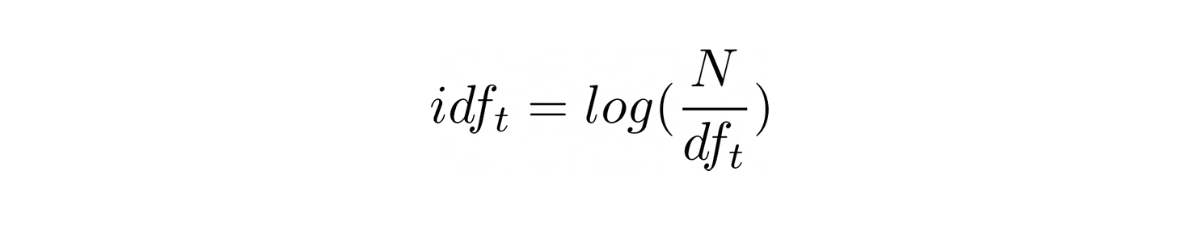

Sendo:
* N o número de documentos no corpus;
* t um termo do corpus;
* df(t) o número de documentos em que o termo aparece.

Note que quanto maior df(t), menor será N/df(t), por isso temos uma função decrescente. Depois, passamos essa medida para a escala logarítimica, o que reduz a sua grandeza e portanto é útil principalmente quando temos um corpus grande. A função tem a seguinte curva:



In [ ]:
import math

In [ ]:
def computaIDF(lista_de_docs):
    idf_dic = {}
    N = len(lista_de_docs)

    for palavra in lista_de_docs[0]:
        num_docs_aparece = 0
        for doc in lista_de_docs:
            if doc[palavra]>0:
                num_docs_aparece += 1
        
        idf_dic[palavra] = math.log10(N / (num_docs_aparece))

    return (idf_dic)

In [ ]:
estrofes_idf = computaIDF([e1_dic_cont, e2_dic_cont])

In [ ]:
estrofes_idf 

{'acontecimento': 0.3010299956639812,
 'caminho': 0.0,
 'de': 0.3010299956639812,
 'desse': 0.3010299956639812,
 'do': 0.0,
 'esquecerei': 0.3010299956639812,
 'fatigadas': 0.3010299956639812,
 'me': 0.3010299956639812,
 'meio': 0.0,
 'minhas': 0.3010299956639812,
 'na': 0.3010299956639812,
 'no': 0.0,
 'nunca': 0.3010299956639812,
 'pedra': 0.0,
 'que': 0.3010299956639812,
 'retinas': 0.3010299956639812,
 'tinha': 0.0,
 'tão': 0.3010299956639812,
 'uma': 0.0,
 'vida': 0.3010299956639812}

## Gráfico

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


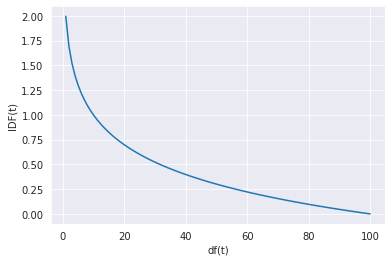

In [ ]:
x = np.linspace(0,100,100)
y = np.log10(100/x)

# Plotando

sns.set_style('darkgrid')
fig, ax = plt.subplots() 

ax.plot(x,y, label = "log(N/df(t))")
ax.set_xlabel('df(t)')
ax.set_ylabel('IDF(t)')

plt.show()

## Juntando TF-IDF

Para obter a pontuação TF-IDF, basta então multiplicar essas duas medidas. Assim, quanto maior a TF e a IDF, obteremos uma pontuação maior, ou seja, as palavras consideradas mais relevantes serão aquelas que aparecem muito em um documento, mas pouco em outros.

In [ ]:
def computaTFIDF(tf_bow, idfs):
    tfidf = {}

    for palavra in tf_bow:
        tf = tf_bow[palavra]
        idf = idfs[palavra]
        tfidf[palavra] = tf*idf
        
    return(tfidf)

In [ ]:
e1_tfidf = computaTFIDF(e1_tf_bow, estrofes_idf)
e2_tfidf = computaTFIDF(e2_tf_bow, estrofes_idf)

In [ ]:
e1_tfidf

{'acontecimento': 0.0,
 'caminho': 0.0,
 'de': 0.0,
 'desse': 0.0,
 'do': 0.0,
 'esquecerei': 0.0,
 'fatigadas': 0.0,
 'me': 0.0,
 'meio': 0.0,
 'minhas': 0.0,
 'na': 0.0,
 'no': 0.0,
 'nunca': 0.0,
 'pedra': 0.0,
 'que': 0.0,
 'retinas': 0.0,
 'tinha': 0.0,
 'tão': 0.0,
 'uma': 0.0,
 'vida': 0.0}

In [ ]:
e2_tfidf

{'acontecimento': 0.00813594582875625,
 'caminho': 0.0,
 'de': 0.00813594582875625,
 'desse': 0.00813594582875625,
 'do': 0.0,
 'esquecerei': 0.0162718916575125,
 'fatigadas': 0.00813594582875625,
 'me': 0.0162718916575125,
 'meio': 0.0,
 'minhas': 0.00813594582875625,
 'na': 0.00813594582875625,
 'no': 0.0,
 'nunca': 0.0162718916575125,
 'pedra': 0.0,
 'que': 0.00813594582875625,
 'retinas': 0.00813594582875625,
 'tinha': 0.0,
 'tão': 0.00813594582875625,
 'uma': 0.0,
 'vida': 0.00813594582875625}

In [ ]:
import pandas as pd

### Resultado

In [ ]:
tfidf_dataframe = pd.DataFrame([e1_tfidf, e2_tfidf])
tfidf_dataframe["Estrofes"] = ['estrofe 1', 'estrofe 2']
tfidf_dataframe.reset_index(inplace=True)
tfidf_dataframe.drop('index', 1, inplace = True)
tfidf_dataframe.set_index('Estrofes', inplace=True)
tfidf_dataframe.index.name = None

tfidf_dataframe

,no,meio,do,caminho,tinha,uma,pedra,nunca,me,esquecerei,desse,acontecimento,na,vida,de,minhas,retinas,tão,fatigadas,que
estrofe 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
estrofe 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016272,0.016272,0.016272,0.008136,0.008136,0.008136,0.008136,0.008136,0.008136,0.008136,0.008136,0.008136,0.008136


# Tabela BoW

In [ ]:
trecho = 'nunca me esquecerei que no meio do caminho tinha uma pedra tinha uma pedra no meio do caminho no meio do caminho tinha uma pedra'
trecho = trecho.split()

In [ ]:
one_hot_dic = {}

for i in range(len(Vocab)):
    palavra = Vocab[i]
    vetor = cria_vetor_documento(trecho, Vocab)
    one_hot_dic[palavra] = vetor[i]

In [ ]:
contagem_dic = dicionario_de_contagem(Vocab, trecho)

In [ ]:
tabela = pd.DataFrame([one_hot_dic, contagem_dic])
tabela["nomes"] = ['one-hot encoding', 'contagem']
tabela.reset_index(inplace=True)
tabela.drop('index', 1, inplace = True)
tabela.set_index('nomes', inplace=True)
tabela.index.name = None

tabela

,no,meio,do,caminho,tinha,uma,pedra,nunca,me,esquecerei,desse,acontecimento,na,vida,de,minhas,retinas,tão,fatigadas,que
one-hot encoding,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1
contagem,3,3,3,3,3,3,3,1,1,1,0,0,0,0,0,0,0,0,0,1
